In [1]:
import PAA_LISA
import NOISE_LISA
import os

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import random
import os
from fractions import Fraction
import math
import datetime
from scipy.interpolate import interp1d
from scipy.interpolate import RegularGridInterpolator
import warnings
warnings.filterwarnings('ignore', 'The iteration is not making good progress')
#warnings.filterwarnings("error")
import scipy.optimize

year2sec=32536000
day2sec=year2sec/365.25
c=300000000

In [2]:
input_param = {
        'calc_method': 'Waluschka',
        'plot_on':False, #If plots will be made
        'dir_savefig': os.getcwd(), # The directory where the figures will be saved. If False, it will be in the current working directory
        'noise_check':False,
        'home':'/home/ester/git/synthlisa/', # Home directory
        'directory_imp': False,
        'num_back': 0,
        'dir_orbits': '/home/ester/git/synthlisa/orbits/', # Folder with orbit files
        'length_calc': 20, # Length of number of imported datapoints of orbit files. 'all' is also possible
        'dir_extr': 'zzzWaluschka_no_abberation', # This will be added to the folder name of the figures
        'timeunit':'Default', # The timeunit of the plots (['minutes'],['days']['years'])
        'LISA_opt':True, # If a LISA object from syntheticLISA will be used for further calculations (not sure if it works properly if this False)
        'arm_influence': True, # Set True to consider the travel time of the photons when calculating the nominal armlengths
        'tstep':False,
        'delay':True, #'Not ahead' or False
        'method':'fsolve', # Method used to solve the equation for the photon traveling time
        'valorfunc':'Function', #
        'select':'Hallion', # Select which orbit files will be imported ('all' is all)
        'test_calc':False,
        'abberation':False,
        'delay': True
        }

data_all = PAA_LISA.runfile.do_run(input_param)

['positions_timestep_days_scale_1000.txt', 'Folkner_orbit_timestep_seconds_scale_10.txt', 'readable.py', 'NGO_1M_10deg_synthlisa_timestep_days_scale_1000.txt']
['McKenzie_orbit_timestep_seconds_scale_1000.txt', 'Folkner_orbit_timestep_seconds_scale_1.txt', 'Hallion_2pt5G_orbits_pos_uniquedays_timestep_days_scale_1000.txt']
['Folkner_orbit_timestep_seconds_scale_10.txt', 'NGO_1M_10deg_synthlisa_timestep_days_scale_1.txt', 'Folkner_orbit_timestep_seconds_scale_1.txt', 'NGO_1M_10deg_synthlisa_timestep_days_scale_1000.txt']
Dir_extr:zzzWaluschka_no_abberation
Dir_extr:zzzWaluschka_no_abberation
Dir_extr:zzzWaluschka_no_abberation
Dir_extr:zzzWaluschka_no_abberation
Dir_extr:zzzWaluschka_no_abberation
Dir_extr:zzzWaluschka_no_abberation
Getting scale by filename:
1000.0

Getting timestep by filename:
days

Waluschka

Importing Orbit
20 datapoints
Done in 0.038121
Selected calculation method is: Waluschka

Selected calculation method is: Waluschka

Selected calculation method is: Waluschka



In [3]:
for k in range(0,len(data_all)/2):
    #data = PAA_res[str(k+1)]
    data = data_all[str(k+1)]
t_vec = data.t_all

In [4]:
Ndata = NOISE_LISA.Noise(data=data)

Obtaining noise
Obaining lasernoise
Obtaining shotnoise
Not using WFE


In [5]:
Ndata.PAA_point()

0

In [6]:
wfe = NOISE_LISA.WFE(Ndata=Ndata)

In [7]:
wfe.tele_control='no control'
wfe.pupil(Nbins=20)
wfe.side = 'r'
wfe.scale = 1#1e-9 # Scales distance of SC

wfe.speed_on = True # Makes calculation faster, only valid for long armlengths
wfe.simple = True # Calculates only 1 pixel

In [8]:
wfe.tele_aim(simple=True)
wfe.PAAM_control()

The telescope control method is: no control
 
The PAAM control method is: SS
 


0

In [17]:
ttl = {}
wfe.ttl_pointing_function(option='all')
ttl['pointing_all'] = wfe.ttl_l,wfe.ttl_r
wfe.ttl_pointing_function(option='tilt')
ttl['pointing_tilt'] = wfe.ttl_l,wfe.ttl_r
wfe.ttl_pointing_function(option='piston')
ttl['pointing_piston'] = wfe.ttl_l,wfe.ttl_r

In [23]:
ttl_PAAM_l = []
ttl_PAAM_r = []
ttl_PAAM = wfe.Ndata.PAAMnoise(wfe=wfe)
for i in range(1,4):
    [i_self,i_left,i_right] = PAA_LISA.utils.i_slr(i)
    keyl = str(i_self)+str(i_left)
    keyr = str(i_self)+str(i_right)
    ttl_PAAM_l.append(ttl_PAAM[keyl])
    ttl_PAAM_r.append(ttl_PAAM[keyr])

ttl['PAAM'] = PAA_LISA.utils.func_over_sc(ttl_PAAM_l),PAA_LISA.utils.func_over_sc(ttl_PAAM_r)
    

Using PAAM pointing from WFE class


In [24]:
t_plot = np.linspace(t_vec[1],t_vec[-2],100)
i=1
side=0 #l=0, r=1
ttl_sample={}
for t in t_plot:
    for k in ttl.keys():
        if k not in ttl_sample.keys():
            ttl_sample[k]=[]
        ttl_sample[k].append(ttl[k][side](i,t))

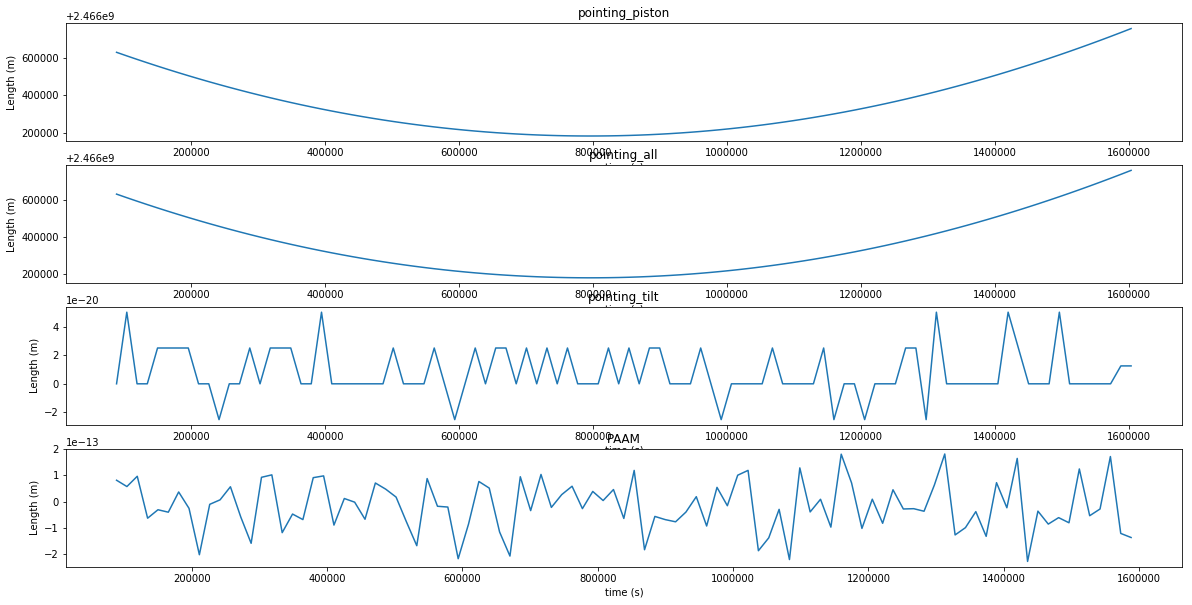

In [25]:
f,ax = plt.subplots(len(ttl_sample.keys()),1,figsize=(20,10))
for k in range(0,len(ttl_sample.keys())):
    key = ttl_sample.keys()[k]
    ax[k].plot(t_plot,ttl_sample[key],label=key)
    ax[k].set_title(key)
    ax[k].set_xlabel('time (s)')
    ax[k].set_ylabel('Length (m)')

In [14]:
...to do: add jitter

Using PAAM pointing from WFE class


In [13]:
...

SyntaxError: invalid syntax (<ipython-input-13-182370b4007f>, line 1)

In [ ]:
wfe.beam_aim_vec_l(1,12321)

In [ ]:
i=1
LA = PAA_LISA.la()

In [ ]:
t_plot = np.linspace(t_vec[0],t_vec[4],50)
beam_aim_l = []
tele_aim_l = []
for t in t_plot:
    beam_aim_l.append(wfe.beam_aim_l(i,t))
    tele_aim_l.append(LA.angle(wfe.tele_aim_l(i,t),wfe.Ndata.data.r_func(i,t)))

In [ ]:
f,ax = plt.subplots(4,1)
ax[0].plot(t_plot,beam_aim_l,label='PAAM_SS')
ax[1].plot(t_plot,tele_aim_l,label='tele_fc')

In [ ]:
self = wfe
L_tele = 2 #length tele [m]
i_self=1
side='l'

In [ ]:
def zern_aim(self,i_self,t,side='l'):
    [i_self,i_left,i_right] = PAA_LISA.utils.i_slr(i_self)
    n = Ndata.data.n_func(i_self,t)

    if side=='l':
        i_next = i_left
        tdel = self.Ndata.data.L_rl_func_tot(i_self,t)
        n_next = Ndata.data.n_func(i_left,t-tdel)
        tele_rec = LA.unit(self.tele_aim_l(i_self,t))*L_tele
        beam_send = self.beam_aim_vec_r(i_next,t-tdel)
        dist = tdel*c
        beam_ideal = self.Ndata.data.v_r_func_tot(i_next,t-tdel)

    elif side=='r':
        i_next = i_right
        tdel = self.Ndata.data.L_rr_func_tot(i_self,t)
        n_next = Ndata.data.n_func(i_right,t-tdel)
        tele_rec = LA.unit(self.tele_aim_r(i_self,t))*L_tele
        beam_send = self.beam_aim_vec_l(i_next,t-tdel)
        dist = tdel*c
        beam_ideal = self.Ndata.data.v_l_func_tot(i_next,t-tdel)


    # Calculating tilt
    tele_beamcoor = LA.tele_coor(-tele_rec,beam_send,n_next)
    angx = -np.arcsin(tele_beamcoor[0]/np.linalg.norm(tele_beamcoor))
    angy = -np.arcsin(tele_beamcoor[1]/np.linalg.norm(tele_beamcoor))

    #Calculating offset
    tele_pos = beam_ideal - tele_rec
    [xoff,yoff,zoff] = LA.tele_coor(tele_pos,beam_send,n_next)
    piston = wfe.z_solve(xoff,yoff,zoff)
    R = wfe.R(piston)

    # Tilt by offset
    angxoff = np.arcsin(xoff/R)
    angyoff = np.arcsin(yoff/R)

    # Zernike polynomials
    angx_tot = angx+angxoff
    angy_tot = angy+angyoff
    thmn11 = np.arctan(angx_tot/angy_tot)
    zmn11 = (angx_tot**2 + angy_tot**2)**0.5
    zmn00 = piston

    zmn={}
    thmn={}
    zmn['00'] = zmn00
    zmn['11'] = zmn11
    thmn['11'] = thmn11
    
    
    return [xoff,yoff,zoff],zmn,thmn

def obtain_ttl(self,zmn,thmn,offset,piston=True,tilt=True,mode='ttl'):
    ps=np.zeros((self.Nbinsx,self.Nbinsy))
    if piston==False:
        zmn['00']=False
        thmn['00']=False
    if tilt==False:
        zmn['11']=False
        thmn['11']=False
    for n in range(0,2):
        for m in range(-n,n+1):
            if ((m%2) == (n%2)):
                ps = ps + self.zern(m,n,zmn=zmn,thmn=thmn,offset=[xoff,yoff],mode=mode)
    if mode=='phase':
        ps = ps%(2*np.pi)
    wave_ttl = np.nanmean(ps)
    
    return ps, wave_ttl

In [ ]:
wfe.tele_aim(method='no control',simple=True)
wfe.PAAM_control()

print(LA.unit(wfe.tele_aim_l(1,12321)))
print(wfe.beam_aim_l(1,12321))
print(wfe.beam_aim_vec_l(1,12321))
print(LA.unit(wfe.Ndata.data.v_l_func_tot(1,12321))*2)

print(np.degrees(LA.angle(wfe.Ndata.data.v_l_func_tot(1,12321),wfe.tele_aim_l(1,12321))))

In [ ]:
wfe.tele_aim(method='full control',simple=True)
wfe.PAAM_control()

print(wfe.tele_aim_l(1,12321))
print(wfe.beam_aim_l(1,12321))
print(wfe.beam_aim_vec_l(1,12321))
print(LA.unit(wfe.Ndata.data.v_l_func_tot(1,12321))*2)

In [ ]:
ps_all = []
wave_ttl_all = []
PAAM_aim = []
mode = 'ttl'
i_self=1
side='l'
t_calc = np.linspace(t_vec[1],t_vec[-2],500)
for t in t_calc:
    [xoff,yoff,zoff],zmn,thmn = zern_aim(wfe,i_self,t,side=side)
    ps,wave_ttl = obtain_ttl(wfe,zmn,thmn,[0,0],piston=True,tilt=True,mode=mode)
    ps_all.append(ps_all)
    wave_ttl_all.append(wave_ttl)
    PAAM_aim.append(wfe.beam_aim_l(i_self,t))

In [ ]:
f,ax = plt.subplots(4,1)
ax[0].plot(t_calc,wave_ttl_all)
ax[1].plot(t_calc,PAAM_aim)

In [ ]:
plt.matshow(ps,cmap='magma')
plt.colorbar()

In [ ]:
wfe.beam_aim_l(1,12321)

In [ ]:
# Calculating offset

...Ga hier verder




pos_send = np.array(self.Ndata.data.LISA.putp(i_next,t-tdel))
pos_rec = np.array(self.Ndata.data.LISA.putp(i_self,t-tdel)) #... set on Waluschka)

tele_rel = LA.unit(tele_rec)*L_tele
O_tele = pos_rec - pos_send +tele_rel # ... Abram vs. Waluschka
tele_beam = np.dot(O_tele,LA.unit(beam))*LA.unit(beam)

tele_yoff = LA.outplane(O_tele - tele_beam,n)
tele_xoff = np.linalg.norm(O_tele-tele_beam-tele_yoff)
tele_yoff = np.linalg.norm(tele_yoff)
tele_zoff = np.linalg.norm(tele_beam) - np.linalg.norm(beam)


zmn={}

zmn['11'] = zmn11
thmn={}
thmn['11'] = thmn11
zxoff = tele_xoff*np.tan(angx)
zyoff = tele_yoff*np.tan(angy)
xoff = tele_xoff
yoff = tele_yoff
zoff = np.linalg.norm(tele_beam)+zxoff+zyoff
zmn['00'] = zoff
thmn['00'] = 0
xoff = xoff/np.cos(angx)
yoff = yoff/np.cos(angy)
offset = np.array([xoff,yoff])

In [ ]:
i = 1
t = t_vec[2]
tele_fc(i,t+2)

In [ ]:
tele_nc(i,t)

In [ ]:
tele_SS(i,t+2)

In [ ]:
wfe.Ndata.PAA_point()

In [ ]:
wfe.Ndata.PAA_point_l(1,12321)

In [ ]:
wfe.PAAM_control(method='SS')
wfe.beam_aim_l(1,t_vec[2]+2)

In [ ]:
wfe.PAAM_control(method='fc')
wfe.beam_aim_l(1,t_vec[2])

In [ ]:
wfe.tele_control_ss(step_max=4,dt = 3600)

In [ ]:
i=1
t = t_vec[2]
wfe.simple=False
wfe.jitter=[False,False]

In [ ]:
labda = wfe.Ndata.data.labda
w0 = wfe.Ndata.data.w0
E0 = 1 #...adjust
k = (2*np.pi)/labda
D = wfe.Ndata.data.D
LA = PAA_LISA.utils.la()
L_tele = 2 # length telescope

In [ ]:
wfe.do_ttl_send()

In [ ]:
wfe.scan_tele()